In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

## trying with all variables, including macro

In [16]:
## trying with all variables
df2 = pd.read_csv('data/train_data_macro_allvar_ts.csv')
test2 = pd.read_csv('data/test_data_macro_allvar_ts.csv')
df2.tail()

,storey_range,floor_area_sqm,resale_price,date,gdp in chained (2015) dollars,assets,liabilities,mas core inflation measure,m_from2017,lease_months_left,...,flat_model_Adjoined flat,flat_model_Type S1,flat_model_2-room,flat_model_Type S2,flat_model_Premium Apartment Loft,flat_model_Terrace,flat_model_Multi Generation,flat_model_3Gen,flat_model_Improved-Maisonette,flat_model_Premium Maisonette
176690,0.2500,0.201835,375000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,658,...,0,0,0,0,0,0,0,0,0,0
176691,0.1875,0.266055,490000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,653,...,0,0,0,0,0,0,0,0,0,0
176692,0.0625,0.233945,440000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,650,...,0,0,0,0,0,0,0,0,0,0
176693,0.1250,0.165138,425000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,646,...,0,0,0,0,0,0,0,0,0,0
176694,0.0625,0.275229,480000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,729,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test2.head()

,storey_range,floor_area_sqm,resale_price,date,gdp in chained (2015) dollars,assets,liabilities,mas core inflation measure,m_from2017,lease_months_left,...,flat_model_Adjoined flat,flat_model_Type S1,flat_model_2-room,flat_model_Type S2,flat_model_Premium Apartment Loft,flat_model_Terrace,flat_model_Multi Generation,flat_model_3Gen,flat_model_Improved-Maisonette,flat_model_Premium Maisonette
0,0.0625,0.279817,625000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,620,...,0,0,0,0,0,0,0,0,0,0
1,0.0625,0.334862,538000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,899,...,0,0,0,0,0,0,0,0,0,0
2,0.0625,0.169725,355000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,696,...,0,0,0,0,0,0,0,0,0,0
3,0.0000,0.229358,410000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,675,...,0,0,0,0,0,0,0,0,0,0
4,0.0000,0.165138,388000.0,2024-04-01,137603.1,3288024.2,368376.3,112.219,1.0,699,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df2 = df2.groupby('date').mean().reset_index()
test2 = test2.groupby('date').mean().reset_index()
# set date as the index column
df2.set_index('date', inplace=True)
test2.set_index('date', inplace=True)

In [19]:
df2.tail()

,storey_range,floor_area_sqm,resale_price,gdp in chained (2015) dollars,assets,liabilities,mas core inflation measure,m_from2017,lease_months_left,town_sengkang,...,flat_model_Adjoined flat,flat_model_Type S1,flat_model_2-room,flat_model_Type S2,flat_model_Premium Apartment Loft,flat_model_Terrace,flat_model_Multi Generation,flat_model_3Gen,flat_model_Improved-Maisonette,flat_model_Premium Maisonette
date,,,,,,,,,,,,,,,,,,,,,
2023-12-01,0.141211,0.290208,578542.637181,139345.6,3178795.1,364286.8,110.866,0.954023,884.486257,0.076462,...,0.001499,0.001000,0.003498,0.001000,0.000500,0.000000,0.000500,0.002499,0.0,0.0
2024-01-01,0.142677,0.297104,591372.005344,135612.1,3237721.6,365018.3,111.531,0.965517,889.862977,0.080916,...,0.000763,0.000000,0.001145,0.000382,0.000763,0.000000,0.000000,0.000000,0.0,0.0
2024-02-01,0.139520,0.295009,585742.216720,135612.1,3237721.6,365018.3,112.086,0.977011,884.737512,0.069274,...,0.000943,0.000471,0.003299,0.000471,0.000471,0.000943,0.000943,0.000471,0.0,0.0
2024-03-01,0.135967,0.296749,596945.804438,135612.1,3237721.6,365018.3,111.821,0.988506,882.804008,0.068426,...,0.002444,0.001466,0.002933,0.000489,0.000000,0.000489,0.000978,0.000489,0.0,0.0
2024-04-01,0.133387,0.297777,594934.804425,137603.1,3288024.2,368376.3,112.219,1.000000,875.590293,0.000000,...,0.000714,0.000000,0.000714,0.000000,0.000714,0.000714,0.000000,0.000000,0.0,0.0


In [20]:
test2.tail()

,storey_range,floor_area_sqm,resale_price,gdp in chained (2015) dollars,assets,liabilities,mas core inflation measure,m_from2017,lease_months_left,town_sengkang,...,flat_model_Adjoined flat,flat_model_Type S1,flat_model_2-room,flat_model_Type S2,flat_model_Premium Apartment Loft,flat_model_Terrace,flat_model_Multi Generation,flat_model_3Gen,flat_model_Improved-Maisonette,flat_model_Premium Maisonette
date,,,,,,,,,,,,,,,,,,,,,
2024-08-01,0.140070,0.297586,621374.284351,142350.4,3350578.6,374027.5,112.457,1.045977,873.354714,0.083462,...,0.001932,0.000773,0.003091,0.001159,0.000773,0.000386,0.000000,0.001159,0.000386,0.000000
2024-09-01,0.140178,0.295119,629331.851566,142350.4,3350578.6,374027.5,112.620,1.057471,875.373581,0.083522,...,0.001362,0.001362,0.004539,0.000908,0.000000,0.000000,0.000000,0.001816,0.000000,0.000000
2024-10-01,0.142247,0.293790,629575.052797,146375.8,3431440.9,379400.7,112.299,1.068966,875.003274,0.079046,...,0.000935,0.001403,0.002806,0.001403,0.000000,0.001403,0.000000,0.000935,0.000000,0.000000
2024-11-01,0.134817,0.299150,635626.712224,146375.8,3431440.9,379400.7,112.274,1.080460,875.697252,0.076205,...,0.001555,0.000518,0.006221,0.001037,0.000000,0.001037,0.000518,0.000000,0.000000,0.000518
2024-12-01,0.137707,0.292999,638060.746572,146375.8,3431440.9,379400.7,112.867,1.091954,873.905910,0.078960,...,0.000946,0.004255,0.005674,0.000000,0.000000,0.000473,0.000000,0.000000,0.000000,0.000000


In [21]:
# Fitting a VAR model
model1 = VAR(df2)

/Users/Athena/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
# Determining the optimal lag order
lag_order_results1 = model1.select_order(maxlags=0)
print(lag_order_results1.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0     -312.5*     -311.5* 1.861e-136*     -312.1*
-------------------------------------------------


In [23]:
best_lag1 = 1

In [24]:
model1_fitted = model1.fit(best_lag1)
print(model1_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Apr, 2025
Time:                     21:28:15
--------------------------------------------------------------------
No. of Equations:         35.0000    BIC:                   -292.579
Nobs:                     86.0000    HQIC:                  -314.066
Log likelihood:           11116.1    FPE:               1.41449e-142
AIC:                     -328.538    Det(Omega_mle):    6.83259e-148
--------------------------------------------------------------------
Results for equation storey_range
                                          coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------
const                                    17947.742531     25090.834884            0.715           0.474
L1.storey_range                              0.153069         0.1

In [25]:
forecast1_steps = len(test2)
forecast1_input = df2.values[-best_lag1:]

forecast1 = model1_fitted.forecast(y=forecast1_input, steps=forecast1_steps)
forecast1_df = pd.DataFrame(forecast1, index=test2.index, columns=test2.columns)

In [26]:
target = 'resale_price'
y_true1 = test2[target]
y_pred1 = forecast1_df[target]

# evaluate model
mae1 = mean_absolute_error(y_true1, y_pred1)
rmse1 = np.sqrt(mean_squared_error(y_true1, y_pred1))

print(f'MAE: {mae1}')
print(f'RMSE: {rmse1}')

MAE: 32890.28593826567
RMSE: 35644.23521400979


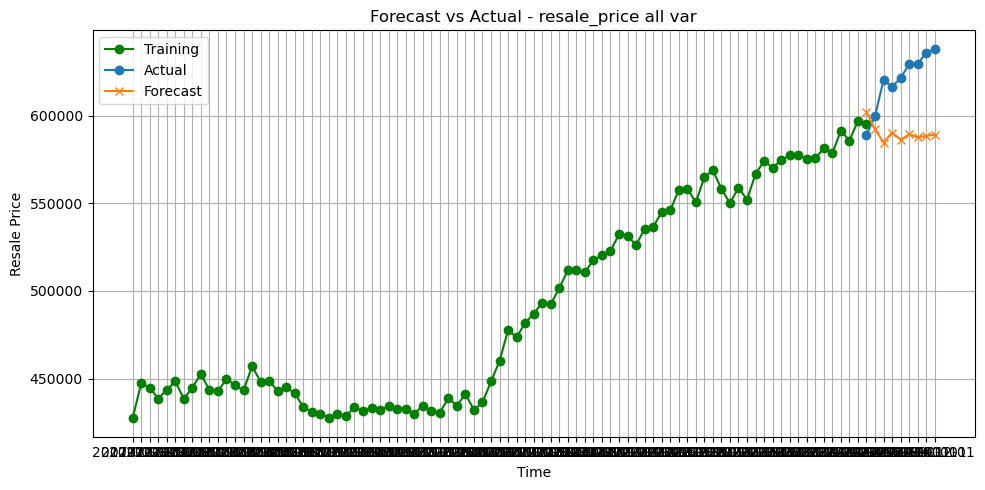

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(df2.index, df2[target], label='Training', color = 'green', marker='o')
plt.plot(test2.index, y_true1, label='Actual', marker='o')
plt.plot(forecast1_df.index, y_pred1, label='Forecast', marker='x')
plt.title(f"Forecast vs Actual - {target} all var")
#plt.xticks(min(df1.index), max(forecast_df.index), 30) # check for format of the date time intervals
plt.xlabel("Time")
plt.ylabel("Resale Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## xgboost for all var multivariate model

In [28]:
ignore = ['date', 'resale_price']
#change all to numeric values except date column
df2 = df2.apply(pd.to_numeric, errors='coerce')
features = [col for col in df2.columns if col not in ignore]

# Train model
model3 = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=5)
model3.fit(df2[features], df2[target])

# Predict
y_pred = model3.predict(test2[features])
y_true = test2[target]

In [29]:
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")


XGBoost MAE: 31832.40
XGBoost RMSE: 36037.76


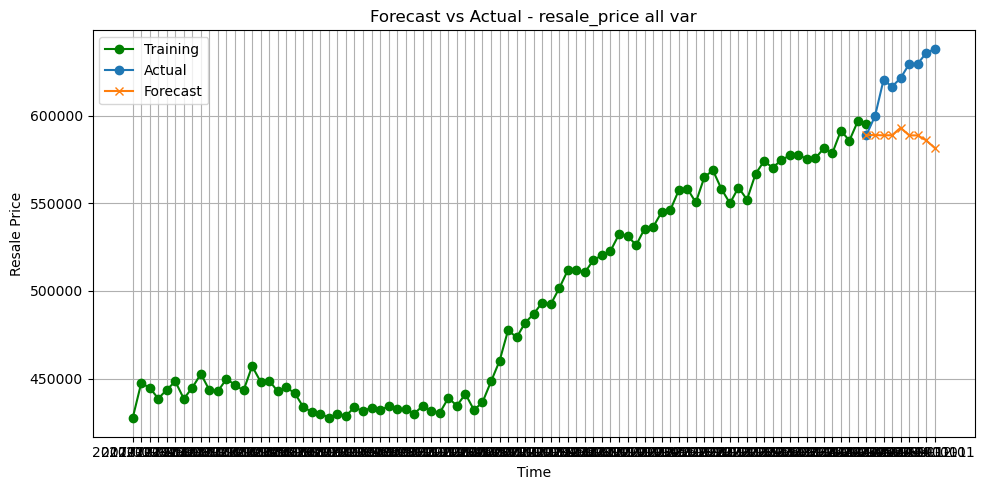

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df2.index, df2[target], label='Training', color = 'green', marker='o')
plt.plot(test2.index, y_true1, label='Actual', marker='o')
plt.plot(test2.index, y_pred, label='Forecast', marker='x')
plt.title(f"Forecast vs Actual - {target} all var")
#plt.xticks(min(df1.index), max(forecast_df.index), 30) # check for format of the date time intervals
plt.xlabel("Time")
plt.ylabel("Resale Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()